
<img src="../Resources/Images/Slides-Logo.png" alt="Drawing" style="width: 400px;"/>

<center> <a href='https://www.linkedin.com/in/raulm8/'>by Raul Maldonado</a></center>

# Overview

## Introduction


This code is designated for my PyBay2019 talk on a (frequentist) approach to A/B Testing, in Python.

For documented remarks and commentary, [you can find out more from the Slide Deck](https://docs.google.com/presentation/d/1nr8O-hS070yhBZoc5KtMQgEdremG0-oZP0ujUnocELc/edit?usp=sharing).

Enjoy! :D


## AB Testing

### Theory +more

A/B Testing is "[a randomized experiment of two variants, A and B.]((https://en.wikipedia.org/wiki/A/B_testing))” This test quantitatively compares two versions with a single variable to compare what variant was effective. 

For example, let's say we ran a digital ad campaign, with the following text. Using that text script, we want an engaging background behind us to get a higher % of clicks, Click Through Rate (CTR), between two backgrounds, see below.

What is a better background to run this ad campaign on? Moreover, is it better than the other option--that is, is it more significant than the original/control option to switch to a different background, the variant option?

### The Format

Generally, A/B tests are abstractly in the form of the following format:

![AB Testing Format](../Resources/Images/ABTesting-Format.PNG)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


For more traditional A/B tests, in the statistics world "Hypotheses tests", individuals are taught the following format for determining what assumptions and calculations should be contained in your AB Tests.

![AB-Testing-Choices-Tree](../Resources/Images/AB-Testing-Choices-Tree.png)


However, depending on the question you want to answer, and the type of data you've acquired, the test statistic and assumptions need to first be established, before proceeding onto a suitable test and its calculations

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Wiki.png)



However, depending on the question you want to answer, and the type of data you've acquired, the test statistic and assumptions need to first be established, before proceeding onto a suitable test and its calculations


Once selecting the appropriate test statistic and having the right assumptions, we can go more deeply into the calculations. In the case of CTRs, since we are using % calculations outside of the range of [0-1] between two groups, we could choose either of the following A/B Test formats....

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Wiki.png)


More particularly, we will be proceeding with the Click Through Rate calculations examples, in the following
![AB-Testing-Choices-Tree](../Resources/Images/HighlightedChoice.png)


#### Test of Proportions

Let the proportion $p_i$ be defined as $p_i =\tfrac{x_i}{n_i}$, 

where $x_i$ are the successes and $n_i$ is the total count of the sample.

After consideration of assumptsion like a statement of the significance level $\alpha$, covered later, we...

State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$

$H_1: \bar{p_1} - \bar{p_2} \neq 0$

From there, we calculate the test statistic $t$ from our provided information

Test Statistic:

$t= \tfrac{ \bar{p_1} - \bar{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{p_1 (1-p_1)}{n_1}) + (\tfrac{p_2 (1-p_2)}{n_2})}$

Thereafter, we calculate or find our referred critical test statistic $t^*$, related to our problem statement.

Lastly, a conclusion would be made for this specific test.

#### Chi Square Test (Optional)

Relatably, we can use a similiar process and test statistic in evaluation of proportions. 

Let us have a 2x2 frequency table where columns are two groups of respondents and rows are the two responses "successes" and "failures". 


|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | X_1    | Y_1         | X_1 + Y_1  | 
| Test 2 | X_2    | Y_2         | X_2 + Y_2   |
| Total  | x      | x           | x   | 

Then we can provide an equivalent A/B test for the upcoming CTR metric as followed:


State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$

$H_1: \bar{p_1} - \bar{p_2} \neq 0$

Test Statistic:

$\chi^2= \tfrac{(O-E)^2}{E}$, 

where $O$ are the Observed values and $E$ are the Expected values.

> Note:
Expected values are calculated as such:
> For the top left region, it would be $\tfrac{( x_{Clicks} * (X_1 + Y_1)}{x_T }$

|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | $Y_1$    | $Y_1$         | $X_1 + Y_1$  | 
| Test 2 | $X_2 $   | $Y_2 $        | $X_2 + Y_2 $  |
| Total  | $x_{Clicks}$      | $x_{No Clicks}$        | $x_T$   | 

# Testing Time

In [82]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

In [94]:
fileName = 'DataAnalystCampaignDailyStats-2019.csv' # Insert your filename
filePath = os.path.join('..','Resources','Data',fileName)

## 1. Data Collection

In [74]:
campaignsDf = pd.read_csv(filePath,skiprows=2)

In [75]:
campaignsDf.head()

,Day,Campaign,Currency,Clicks,Impressions,Cost,CTR
0,2019-07-02,Data Analyst #3,USD,0,6,0.00,0.00%
1,2019-07-02,Data Analyst #2,USD,0,13,0.00,0.00%
2,2019-07-03,Data Analyst #3,USD,3,312,3.82,0.96%
3,2019-07-03,Data Analyst #2,USD,8,346,8.18,2.31%
4,2019-07-04,Data Analyst #3,USD,8,376,8.61,2.13%


In [126]:
campaignsDf['CTR'] = campaignsDf['Clicks'] / campaignsDf['Impressions']

In [127]:
campaign1_Df = campaignsDf[campaignsDf['Campaign'] == 'Data Analyst #2']

In [128]:
campaign2_Df = campaignsDf[campaignsDf['Campaign'] == 'Data Analyst #3']

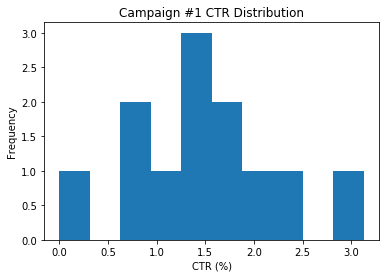

In [90]:
campaign1_Df['CTR'].plot(kind='hist')
plt.title('Campaign #1 CTR Distribution')
plt.xlabel('CTR (%)')
plt.show()

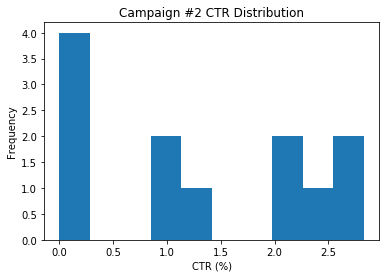

In [91]:
campaign2_Df['CTR'].plot(kind='hist')
plt.title('Campaign #2 CTR Distribution')
plt.xlabel('CTR (%)')
plt.show()

## 2. Hypothesis

Overall, we want to evaluate if there is a significant difference in the two group's CTR performance. Formulating that into the "Hypothesis Test" structure, we state the following:



We declare our "**level of significance**", $\alpha$, to be equal to $\alpha = .05$, for a one sided-test. 

In [280]:
alpha = 0.05

$H_0: \bar{p_1} - \bar{p_2} = 0$

> (i.e. There is no significant difference between the two campaigns)


$H_1: \bar{p_1} - \bar{p_2} \neq 0$

> (i.e. There is a significant difference between the two campaigns)

In [190]:
n1 = campaign1_Df['Impressions'].sum()
p1 = campaign1_Df['Clicks'].sum() / campaign1_Df['Impressions'].sum()

n2 = campaign2_Df['Impressions'].sum()
p2 = campaign2_Df['Clicks'].sum() / campaign2_Df['Impressions'].sum()

## 3. Analyze The Results


$t= \tfrac{ \bar{p_1} - \bar{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{p_1 (1-p_1)}{n_1}) + (\tfrac{p_2 (1-p_2)}{n_2})}$

In [191]:
se1 = (p1 * (1- p1))/n1
se2 = (p1 * (1- p1))/n1
standardError = np.sqrt(se1 + se2)

In [106]:
tStatistic = abs(p1-p2) / standardError

In [272]:
print(f'Campaign 1 CTR: {round(p1,4)}' + f' with Standard Error {se1}.')
print(f'Campaign 2 CTR: {round(p2,4)}' + f' with Standard Error {se2}.\n')

print(f'T Statistic: {round(tStatistic,2)}')

Campaign 1 CTR: 0.0166 with Standard Error 4.458492047466517e-06.
Campaign 2 CTR: 0.0134 with Standard Error 4.458492047466517e-06.

T Statistic: 1.08


In [273]:
criticalValue = scipy.stats.t.ppf(1.0 - 0.05, (n1 + n2-2))

#Two Sided P Value
one_side = 1 - scipy.stats.norm(loc = 0, scale = 1).cdf(tStatistic)
pvalue = one_side * 2

In [279]:
print(f'We have critical value t* at {round(criticalValue,2)}\nand p-value of {round(pvalue,2)}')

We have critical value t* at 1.65
and p-value of 0.28


## 4. Conclusions

If the calculated t-statistic $t$ > critical value $t^*$, then we reject the null hypothesis $H_0$, and accept the alternative hypothesis $H_1$. 
> Equivalently, if $p < \alpha$, then we  reject the null hypothesis $H_0$. 

If not, then we fail to reject the null hypothesis $H_0$. 

In [281]:
if pValue < alpha:
    print("We reject the Null Hypothesis H_0")
else:
    print("We fail to reject the Null Hypothesis H_0")

We fail to reject the Null Hypothesis H_0


Therefore, we can say that there is no significant difference between the two campaigns.

# +More! [Optional]

## The Chai -err umm....Chi-Squared Test

In [180]:
df = [ [campaign1_Df['Clicks'].sum(), campaign1_Df['Impressions'].sum()- campaign1_Df['Clicks'].sum(),campaign1_Df['Impressions'].sum()], \
      [campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum() -campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum()] ]

In [182]:
from scipy import stats

twoByTwo_df = pd.DataFrame(df,index=['Campaign 1', 'Campaign 2'] ,columns=['Clicks','No Clicks','Impressions'])
# stats.chi2_contingency(twoByTwo_df)

In [185]:
twoByTwo_df

,Clicks,No Clicks,Impressions
Campaign 1,61,3607,3668
Campaign 2,35,2576,2611


In [197]:
expectedClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['Clicks'].sum() 

expectedNonClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['No Clicks'].sum() 

expectedDf = pd.concat([expectedClicksSeries,expectedNonClicksSeries],axis=1)

In [221]:
expectedDf.columns =['Clicks', 'No Clicks']
expectedDf


,Clicks,No Clicks
Campaign 1,56.080268,3611.919732
Campaign 2,39.919732,2571.080268


In [227]:
chiSquareStatistic = ((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

1.0540173010700733

In [246]:
((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

1.0540173010700733

In [264]:
chiSquareStat, pVal, dof, expected = stats.chi2_contingency(twoByTwo_df)

print('Expected Table: \n',expected,'\n')

# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob

criticalVal = stats.chi2.ppf(prob, dof)

print(f'Degrees of Freedom: {dof}\n')
print('probability=%.2f, critical=%.2f, stat=%.2f \n' % (prob, critical, stat))

print('Decision:')
print(f'For significance level {round(alpha,2)},\n')
if abs(chiSquareStat) >= criticalVal:
    print('We reject the Null Hypothesis, H_0\n')
    print(f'for p = {p} >= {criticalVal}.')
else:
    print('We fail to reject the Null Hypothesis, H_0\n')
    print(f'for p = {p} < {criticalVal}.')

    
### Alternatively can say:    
# if p <= alpha:
#     print('We reject the Null Hypothesis, H_0.')
#     print(f'for p = {p} >= {alpha}.')

# else:
#     print('We fail to reject the Null Hypothesis, H_0.')
#     print(f'for p = {p} < {alpha}.')

Expected Table: 
 [[  56.08026756 3611.91973244 3668.        ]
 [  39.91973244 2571.08026756 2611.        ]] 

Degrees of Freedom: 2

probability=0.95, critical=5.99, stat=1.05 

Decision:
For significance level 0.05,

We fail to reject the Null Hypothesis, H_0

for p = 0.5903683289364599 < 5.991464547107979.


# Remarks

![Image](https://giphy.com/embed/p1FMSGnOdgno4)

<a href="https://giphy.com/gifs/the-muppets-miss-piggy-fozzie-bear-p1FMSGnOdgno4">via GIPHY</a></p>

Prerequisite knowledge: Central Limit Theorem
The Central Limit Theorem (CLT) implies a sample of independent random variables, their sums tends towards to a normal distribution even if the original variables themselves aren't normally distributed, also the sample mean tends towards to a normal distribution (sum and mean are equivalent).

## Overall Instructions

1. Write the original claim and establish the $H_0$ and $H_1$ hypotheses.

2. Find the critical values

3. Calculate the t-statistic

4. Declare decision w.r.t. the established critical values

5. Make a decision to reject or fail to reject the null hypothesis

6. Write the conclusion


https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/

In [ ]:
https://byrony.github.io/understanding-ab-testing-and-statistics-behind.html
    
    
    https://docs.google.com/presentation/d/1k_zR5IkHaIpA6fbTDoa48Gh_LodY7Mjbf56zLro5Uus/edit#slide=id.g31d3c8507d_0_177
        
        
        
        https://stats.stackexchange.com/questions/76875/what-is-the-difference-between-mcnemars-test-and-the-chi-squared-test-and-how/141450#141450

## Remarks

### Chi Square Testing

* Chi-square goodness of fit test
    * Test that determines if a sample data matches a population. For more details on this type, see: Goodness of Fit Test.

* Chi-square test for independence
    * Test that compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.